# The Central Limit Theorem

In [ ]:
import numpy as np
from scipy import stats

The **Central Limit Theorem** states that the distribution of sample means approximates a normal distribution regardless of the shape of the population distribution, under two conditions:

1. larger sample sizes (n > 30) are used, and
2. we repeat the sampling process many times (e.g., 1000 times)

That is, if we take $k=1000$ sample means $(\bar x_1, \bar x_2, ..., \bar x_k)$, each of which is of size, say, $n=50$, and draw the distribution of them, we get a the gaussian distribution, that is centered around the population mean $\mu$ that we are trying to estimate.


<img src="../assets/clt.jpg" alt="Figure: Central Limit Theorem">

Image Source: https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:IllustrationCentralTheorem.png

### Emperically Proving the Central Limit Theorem

In [ ]:
# Generate random samples from a uniform distribution
population = stats.uniform.rvs(size=1000) 

# Take samples of size 30 from the population
sample_size = 30
num_samples = 1000

samples = np.empty((num_samples, sample_size))
for i in range(num_samples):
    samples[i,] = np.random.choice(population, size=sample_size)

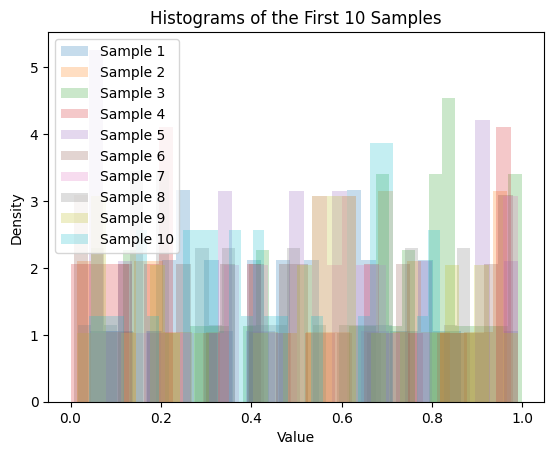

In [ ]:
import matplotlib.pyplot as plt

# Plot the histograms of the first 10 samples
samples_to_plot = 10
for i in range(samples_to_plot):
    plt.hist(samples[i], bins=30, density=True, alpha=0.25, label=f"Sample {i+1}")

plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Histograms of the First {samples_to_plot} Samples")
plt.legend()
plt.show()


In [ ]:
sample_means = samples.mean(axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


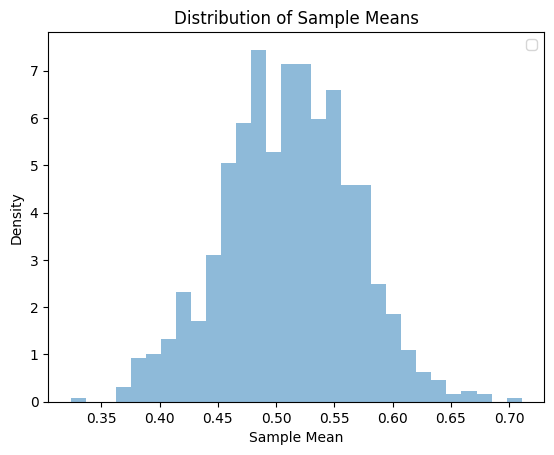

In [ ]:
plt.hist(sample_means, bins=30, density=True, alpha=0.50)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Sample Means")

plt.legend()
plt.show()